**TUGAS**

1. Cari dataset tentang ``boston house price``
2. Tentukan variabel X dan Y-nya. Bisa menggunakan pendekatan knowledge atau T Test Regresi.
3. Feature apa yang memiliki korelasi yang paling besar terhadap price.
4. Coba buat model machine learning untuk memprediksi harga. Algoritma mana yang paling bagus untuk kasus ini.
5. Coba jelaskan setiap prosesnya.

Content
Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town

- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
    - 1https://archive.ics.uci.edu/ml/datasets/Housing
    - 123
    - 20.2. Load the Dataset 124
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to ﬁve Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

In [21]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:,.4f}'.format)

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.0063,18.0000,2.3100,0,0.5380,6.5750,65.2000,4.0900,1,296.0000,15.3000,396.9000,4.9800,24.0000
1,0.0273,0.0000,7.0700,0,0.4690,6.4210,78.9000,4.9671,2,242.0000,17.8000,396.9000,9.1400,21.6000
2,0.0273,0.0000,7.0700,0,0.4690,7.1850,61.1000,4.9671,2,242.0000,17.8000,392.8300,4.0300,34.7000
3,0.0324,0.0000,2.1800,0,0.4580,6.9980,45.8000,6.0622,3,222.0000,18.7000,394.6300,2.9400,33.4000
4,0.0691,0.0000,2.1800,0,0.4580,7.1470,54.2000,6.0622,3,222.0000,18.7000,396.9000,5.3300,36.2000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [3]:
df['RAD'].unique()


array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

In [4]:
tips_reg = sm.OLS(df['MEDV'],sm.add_constant(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]))
hasil = tips_reg.fit()
print(hasil.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          6.72e-135
Time:                        15:37:53   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [5]:
tips_reg = sm.OLS(df['MEDV'],sm.add_constant(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])) #DROP AGE
hasil = tips_reg.fit()
print(hasil.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          6.08e-136
Time:                        15:37:53   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4369      5.080      7.172      0.0

In [6]:
tips_reg = sm.OLS(df['MEDV'],sm.add_constant(df[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])) #DROP INDUS
hasil = tips_reg.fit()
print(hasil.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          5.54e-137
Time:                        15:37:53   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.0

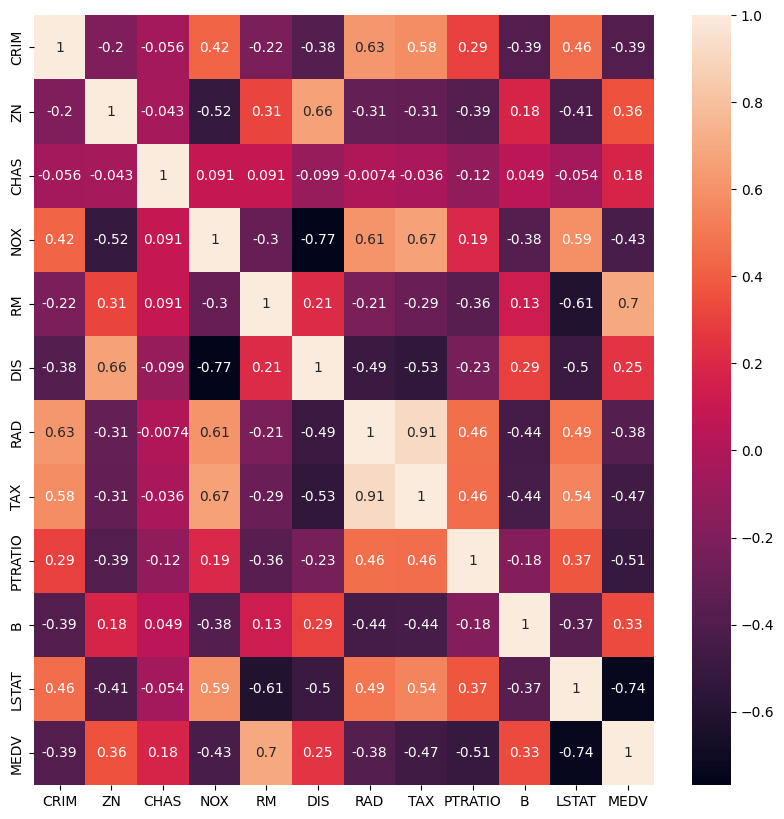

In [7]:
dfCor = df[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV']]

plt.figure(figsize=(10,10))
sns.heatmap(
    data=dfCor.corr(),
    annot=True
)
plt.show()

In [8]:
def pricePredict(CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT):
    y = 36.3411 - (0.1084*CRIM) + (0.0458*ZN) + (2.7187*CHAS) - (17.3760*NOX) + (3.8016*RM) - (1.4927*DIS) + (0.2996*RAD) - (0.0118*TAX) - (0.9465*PTRATIO) + (0.0093*B) - (0.5226*LSTAT)
    return y

In [9]:
df['MEDV_PREDIC'] = df.apply(lambda row: pricePredict(row['CRIM'], row['ZN'], row['CHAS'], row['NOX'], row['RM'], row['DIS'], row['RAD'], row['TAX'], row['PTRATIO'], row['B'], row['LSTAT']), axis=1)

# PENDEKATAN CS

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [11]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'MEDV_PREDIC'],
      dtype='object')

In [12]:
# DEFINE
x = df[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']]
y = df['MEDV']

xtrain, xtest, ytrain, ytest = train_test_split(
    x,
    y,
    test_size=0.2
)

In [13]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

display(pd.DataFrame({
    'data_asli' : ytest,
    'prediksi' : lr.predict(xtest)
}).head())

# CEK MSE
display('MSE', mean_squared_error(ytest, lr.predict(xtest)))

# Cek MAPE tidak begitu sesnsitif dengan outliers
display('MAPE', mean_absolute_percentage_error(ytest, lr.predict(xtest)))

,data_asli,prediksi
145,14,14
118,20,20
224,45,45
112,19,19
373,14,14


'MSE'

6.695859097446391e-27

'MAPE'

3.587369338380185e-15

In [14]:
knn = KNeighborsRegressor()
knn.fit(xtrain,ytrain)

#predict test data
knn.predict(xtest)

##perbandingan

pd.DataFrame({
    'data_asli' : ytest,
    'prediksi' : knn.predict(xtest)
}).head()

# CEK MSE
display('MSE', mean_squared_error(ytest, knn.predict(xtest)))

# Cek MAPE tidak begitu sesnsitif dengan outliers
display('MAPE', mean_absolute_percentage_error(ytest, knn.predict(xtest)))

'MSE'

16.984764705882355

'MAPE'

0.14728714969738535

In [15]:
# Create and train the Decision Tree model
dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)

# Make predictions on the testing data
y_pred = dt.predict(xtest)

# Calculate MSE and MAPE

# CEK MSE
display('MSE', mean_squared_error(ytest, dt.predict(xtest)))

# Cek MAPE tidak begitu sesnsitif dengan outliers
display('MAPE', mean_absolute_percentage_error(ytest, dt.predict(xtest)))

'MSE'

0.07372549019607863

'MAPE'

0.005563934096089732

In [18]:
pd.DataFrame({
    'Model' : ['Linear Model', 'KNN Regression', 'Decision Tree'],
    'MAPE' : [mean_absolute_percentage_error(ytest, lr.predict(xtest)),mean_absolute_percentage_error(ytest, knn.predict(xtest)),mean_absolute_percentage_error(ytest, dt.predict(xtest))]
}).head()

,Model,MAPE
0,Linear Model,0.0000
1,KNN Regression,0.1473
2,Decision Tree,0.0056
